# **Bioinformatics Project - Computational Drug Discovery [Part 2] Exploratory Data Analysis**

In **Part 2**, we will be performing Descriptor Calculation and Exploratory Data Analysis.

## **Install conda and rdkit**

In [1]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2022-09-25 11:54:56--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   148MB/s    in 0.5s    

2022-09-25 11:54:57 (148 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: \ | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6

## **Load bioactivity data**

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('renin_03_bioactivity_data_curated.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL47918,CCCC[C@H](O[C@@H](Cc1ccccc1)C(=O)N1CCC(OCOC)CC...,30.0,active
1,CHEMBL50217,CCCC[C@H](O[C@@H](Cc1ccccc1)C(=O)N1CCC(OCOC)CC...,2.2,active
2,CHEMBL301347,CCCC[C@H](O[C@@H](Cc1ccccc1)C(=O)N1CCC(OCOC)CC...,2.5,active
3,CHEMBL48624,CCCC[C@H](O[C@@H](Cc1ccccc1)C(=O)N1CCC(OCOC)CC...,2.4,active
4,CHEMBL101874,CC[C@H](C)[C@H](NC(=O)[C@@H](NC(=O)[C@H](CC(C)...,1400.0,intermediate
...,...,...,...,...
3039,CHEMBL4210995,CCc1cccc(-c2c(F)cccc2C(O)(CCCNC(=O)OC)[C@@H]2C...,5.0,active
3040,CHEMBL4212859,CCc1cccc(-c2c(F)cccc2C(O)(CCCNC(=O)OC)[C@@H]2C...,2.0,active
3041,CHEMBL4560579,C#CCOc1cnc(C(=O)Nc2cc(F)c(F)c([C@@]3(C)N=C(N)S...,678000.0,inactive
3042,CHEMBL4577527,C#CCOc1cnc(C(=O)Nc2cc(F)c(F)c([C@@]3(C)N=C(N)S...,214000.0,inactive


In [4]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [5]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [6]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL47918,30.0,active,CCCC[C@H](O[C@@H](Cc1ccccc1)C(=O)N1CCC(OCOC)CC...
1,CHEMBL50217,2.2,active,CCCC[C@H](O[C@@H](Cc1ccccc1)C(=O)N1CCC(OCOC)CC...
2,CHEMBL301347,2.5,active,CCCC[C@H](O[C@@H](Cc1ccccc1)C(=O)N1CCC(OCOC)CC...
3,CHEMBL48624,2.4,active,CCCC[C@H](O[C@@H](Cc1ccccc1)C(=O)N1CCC(OCOC)CC...
4,CHEMBL101874,1400.0,intermediate,CC[C@H](C)[C@H](NC(=O)[C@@H](NC(=O)[C@H](CC(C)...
...,...,...,...,...
3039,CHEMBL4210995,5.0,active,CCc1cccc(-c2c(F)cccc2C(O)(CCCNC(=O)OC)[C@@H]2C...
3040,CHEMBL4212859,2.0,active,CCc1cccc(-c2c(F)cccc2C(O)(CCCNC(=O)OC)[C@@H]2C...
3041,CHEMBL4560579,678000.0,inactive,C#CCOc1cnc(C(=O)Nc2cc(F)c(F)c([C@@]3(C)N=C(N)S...
3042,CHEMBL4577527,214000.0,inactive,C#CCOc1cnc(C(=O)Nc2cc(F)c(F)c([C@@]3(C)N=C(N)S...


## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10 

### **Import libraries**

In [7]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [8]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [9]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,745.059,5.2830,2.0,8.0
1,766.033,6.9418,3.0,8.0
2,773.069,5.8374,3.0,9.0
3,787.096,5.1015,3.0,9.0
4,813.010,2.4533,7.0,10.0
...,...,...,...,...
3039,557.707,4.2420,3.0,6.0
3040,543.680,3.5879,4.0,6.0
3041,473.505,2.7009,2.0,8.0
3042,479.459,3.3196,2.0,7.0


### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [10]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,745.059,5.2830,2.0,8.0
1,766.033,6.9418,3.0,8.0
2,773.069,5.8374,3.0,9.0
3,787.096,5.1015,3.0,9.0
4,813.010,2.4533,7.0,10.0
...,...,...,...,...
3039,557.707,4.2420,3.0,6.0
3040,543.680,3.5879,4.0,6.0
3041,473.505,2.7009,2.0,8.0
3042,479.459,3.3196,2.0,7.0


In [11]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL47918,CCCC[C@H](O[C@@H](Cc1ccccc1)C(=O)N1CCC(OCOC)CC...,30.0,active
1,CHEMBL50217,CCCC[C@H](O[C@@H](Cc1ccccc1)C(=O)N1CCC(OCOC)CC...,2.2,active
2,CHEMBL301347,CCCC[C@H](O[C@@H](Cc1ccccc1)C(=O)N1CCC(OCOC)CC...,2.5,active
3,CHEMBL48624,CCCC[C@H](O[C@@H](Cc1ccccc1)C(=O)N1CCC(OCOC)CC...,2.4,active
4,CHEMBL101874,CC[C@H](C)[C@H](NC(=O)[C@@H](NC(=O)[C@H](CC(C)...,1400.0,intermediate
...,...,...,...,...
3039,CHEMBL4210995,CCc1cccc(-c2c(F)cccc2C(O)(CCCNC(=O)OC)[C@@H]2C...,5.0,active
3040,CHEMBL4212859,CCc1cccc(-c2c(F)cccc2C(O)(CCCNC(=O)OC)[C@@H]2C...,2.0,active
3041,CHEMBL4560579,C#CCOc1cnc(C(=O)Nc2cc(F)c(F)c([C@@]3(C)N=C(N)S...,678000.0,inactive
3042,CHEMBL4577527,C#CCOc1cnc(C(=O)Nc2cc(F)c(F)c([C@@]3(C)N=C(N)S...,214000.0,inactive


Now, let's combine the 2 DataFrame

In [12]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [13]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL47918,CCCC[C@H](O[C@@H](Cc1ccccc1)C(=O)N1CCC(OCOC)CC...,30.0,active,745.059,5.2830,2.0,8.0
1,CHEMBL50217,CCCC[C@H](O[C@@H](Cc1ccccc1)C(=O)N1CCC(OCOC)CC...,2.2,active,766.033,6.9418,3.0,8.0
2,CHEMBL301347,CCCC[C@H](O[C@@H](Cc1ccccc1)C(=O)N1CCC(OCOC)CC...,2.5,active,773.069,5.8374,3.0,9.0
3,CHEMBL48624,CCCC[C@H](O[C@@H](Cc1ccccc1)C(=O)N1CCC(OCOC)CC...,2.4,active,787.096,5.1015,3.0,9.0
4,CHEMBL101874,CC[C@H](C)[C@H](NC(=O)[C@@H](NC(=O)[C@H](CC(C)...,1400.0,intermediate,813.010,2.4533,7.0,10.0
...,...,...,...,...,...,...,...,...
3039,CHEMBL4210995,CCc1cccc(-c2c(F)cccc2C(O)(CCCNC(=O)OC)[C@@H]2C...,5.0,active,557.707,4.2420,3.0,6.0
3040,CHEMBL4212859,CCc1cccc(-c2c(F)cccc2C(O)(CCCNC(=O)OC)[C@@H]2C...,2.0,active,543.680,3.5879,4.0,6.0
3041,CHEMBL4560579,C#CCOc1cnc(C(=O)Nc2cc(F)c(F)c([C@@]3(C)N=C(N)S...,678000.0,inactive,473.505,2.7009,2.0,8.0
3042,CHEMBL4577527,C#CCOc1cnc(C(=O)Nc2cc(F)c(F)c([C@@]3(C)N=C(N)S...,214000.0,inactive,479.459,3.3196,2.0,7.0


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [14]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [15]:
df_combined.standard_value.describe()

count    3.044000e+03
mean     1.693124e+04
std      1.317868e+05
min      2.600000e-10
25%      2.000000e+00
50%      1.985000e+01
75%      3.500000e+02
max      2.500000e+06
Name: standard_value, dtype: float64

In [16]:
-np.log10( (10**-9)* 100000000 )

1.0

In [17]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [18]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [19]:
df_norm = norm_value(df_combined)
df_norm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL47918,CCCC[C@H](O[C@@H](Cc1ccccc1)C(=O)N1CCC(OCOC)CC...,active,745.059,5.2830,2.0,8.0,30.0
1,CHEMBL50217,CCCC[C@H](O[C@@H](Cc1ccccc1)C(=O)N1CCC(OCOC)CC...,active,766.033,6.9418,3.0,8.0,2.2
2,CHEMBL301347,CCCC[C@H](O[C@@H](Cc1ccccc1)C(=O)N1CCC(OCOC)CC...,active,773.069,5.8374,3.0,9.0,2.5
3,CHEMBL48624,CCCC[C@H](O[C@@H](Cc1ccccc1)C(=O)N1CCC(OCOC)CC...,active,787.096,5.1015,3.0,9.0,2.4
4,CHEMBL101874,CC[C@H](C)[C@H](NC(=O)[C@@H](NC(=O)[C@H](CC(C)...,intermediate,813.010,2.4533,7.0,10.0,1400.0
...,...,...,...,...,...,...,...,...
3039,CHEMBL4210995,CCc1cccc(-c2c(F)cccc2C(O)(CCCNC(=O)OC)[C@@H]2C...,active,557.707,4.2420,3.0,6.0,5.0
3040,CHEMBL4212859,CCc1cccc(-c2c(F)cccc2C(O)(CCCNC(=O)OC)[C@@H]2C...,active,543.680,3.5879,4.0,6.0,2.0
3041,CHEMBL4560579,C#CCOc1cnc(C(=O)Nc2cc(F)c(F)c([C@@]3(C)N=C(N)S...,inactive,473.505,2.7009,2.0,8.0,678000.0
3042,CHEMBL4577527,C#CCOc1cnc(C(=O)Nc2cc(F)c(F)c([C@@]3(C)N=C(N)S...,inactive,479.459,3.3196,2.0,7.0,214000.0


In [20]:
df_norm.standard_value_norm.describe()

count    3.044000e+03
mean     1.693124e+04
std      1.317868e+05
min      2.600000e-10
25%      2.000000e+00
50%      1.985000e+01
75%      3.500000e+02
max      2.500000e+06
Name: standard_value_norm, dtype: float64

In [21]:
df_final = pIC50(df_norm)
df_final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  del sys.path[0]


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL47918,CCCC[C@H](O[C@@H](Cc1ccccc1)C(=O)N1CCC(OCOC)CC...,active,745.059,5.2830,2.0,8.0,7.522879
1,CHEMBL50217,CCCC[C@H](O[C@@H](Cc1ccccc1)C(=O)N1CCC(OCOC)CC...,active,766.033,6.9418,3.0,8.0,8.657577
2,CHEMBL301347,CCCC[C@H](O[C@@H](Cc1ccccc1)C(=O)N1CCC(OCOC)CC...,active,773.069,5.8374,3.0,9.0,8.602060
3,CHEMBL48624,CCCC[C@H](O[C@@H](Cc1ccccc1)C(=O)N1CCC(OCOC)CC...,active,787.096,5.1015,3.0,9.0,8.619789
4,CHEMBL101874,CC[C@H](C)[C@H](NC(=O)[C@@H](NC(=O)[C@H](CC(C)...,intermediate,813.010,2.4533,7.0,10.0,5.853872
...,...,...,...,...,...,...,...,...
3039,CHEMBL4210995,CCc1cccc(-c2c(F)cccc2C(O)(CCCNC(=O)OC)[C@@H]2C...,active,557.707,4.2420,3.0,6.0,8.301030
3040,CHEMBL4212859,CCc1cccc(-c2c(F)cccc2C(O)(CCCNC(=O)OC)[C@@H]2C...,active,543.680,3.5879,4.0,6.0,8.698970
3041,CHEMBL4560579,C#CCOc1cnc(C(=O)Nc2cc(F)c(F)c([C@@]3(C)N=C(N)S...,inactive,473.505,2.7009,2.0,8.0,3.168770
3042,CHEMBL4577527,C#CCOc1cnc(C(=O)Nc2cc(F)c(F)c([C@@]3(C)N=C(N)S...,inactive,479.459,3.3196,2.0,7.0,3.669586


In [22]:
df_final.pIC50.describe()

count    3044.000000
mean        7.481263
std         1.577461
min         2.602060
25%         6.455932
50%         7.702252
75%         8.698970
max        18.585027
Name: pIC50, dtype: float64

Let's write this to CSV file.

In [23]:
df_final.to_csv('renin_04_bioactivity_data_3class_pIC50.csv')

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [24]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL47918,CCCC[C@H](O[C@@H](Cc1ccccc1)C(=O)N1CCC(OCOC)CC...,active,745.059,5.2830,2.0,8.0,7.522879
1,CHEMBL50217,CCCC[C@H](O[C@@H](Cc1ccccc1)C(=O)N1CCC(OCOC)CC...,active,766.033,6.9418,3.0,8.0,8.657577
2,CHEMBL301347,CCCC[C@H](O[C@@H](Cc1ccccc1)C(=O)N1CCC(OCOC)CC...,active,773.069,5.8374,3.0,9.0,8.602060
3,CHEMBL48624,CCCC[C@H](O[C@@H](Cc1ccccc1)C(=O)N1CCC(OCOC)CC...,active,787.096,5.1015,3.0,9.0,8.619789
5,CHEMBL445118,CC[C@H](C)[C@H](NC(=O)[C@@H](NC(=O)[C@H]1COCCC...,inactive,826.993,1.5399,6.0,11.0,4.000000
...,...,...,...,...,...,...,...,...
3039,CHEMBL4210995,CCc1cccc(-c2c(F)cccc2C(O)(CCCNC(=O)OC)[C@@H]2C...,active,557.707,4.2420,3.0,6.0,8.301030
3040,CHEMBL4212859,CCc1cccc(-c2c(F)cccc2C(O)(CCCNC(=O)OC)[C@@H]2C...,active,543.680,3.5879,4.0,6.0,8.698970
3041,CHEMBL4560579,C#CCOc1cnc(C(=O)Nc2cc(F)c(F)c([C@@]3(C)N=C(N)S...,inactive,473.505,2.7009,2.0,8.0,3.168770
3042,CHEMBL4577527,C#CCOc1cnc(C(=O)Nc2cc(F)c(F)c([C@@]3(C)N=C(N)S...,inactive,479.459,3.3196,2.0,7.0,3.669586


Let's write this to CSV file.

In [25]:
df_2class.to_csv('renin_05_bioactivity_data_2class_pIC50.csv')

---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [26]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

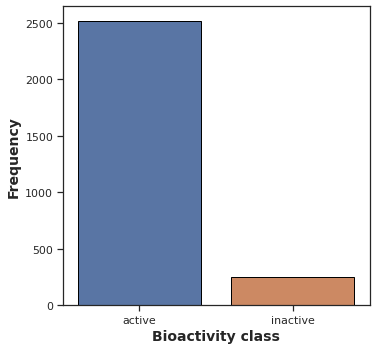

In [27]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

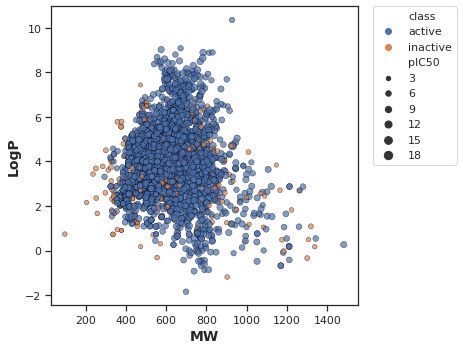

In [28]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

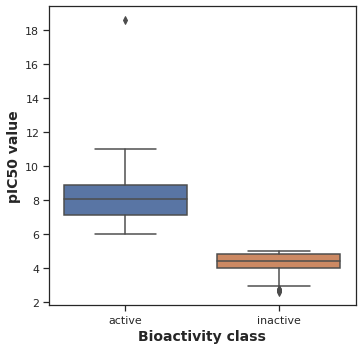

In [29]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [30]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [31]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,640334.0,1.614490e-152,0.05,Different distribution (reject H0)


#### **MW**

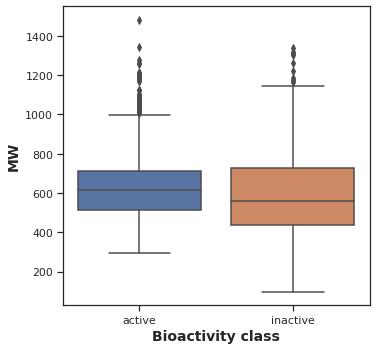

In [32]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [33]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,374272.5,0.000009,0.05,Different distribution (reject H0)


#### **LogP**

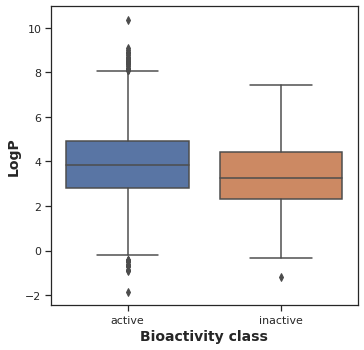

In [34]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [35]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,383628.5,1.846494e-07,0.05,Different distribution (reject H0)


#### **NumHDonors**

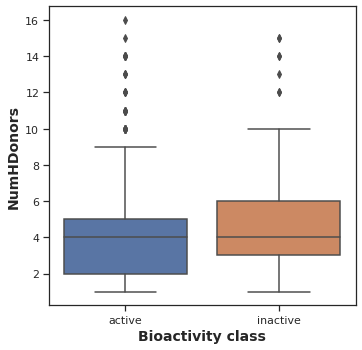

In [36]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [37]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,266495.5,0.000008,0.05,Different distribution (reject H0)


#### **NumHAcceptors**

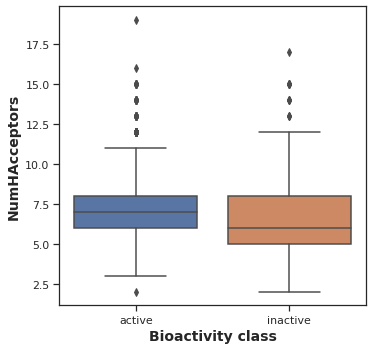

In [38]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [39]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,372580.0,0.000013,0.05,Different distribution (reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

All of the 4 Lipinski's descriptors exhibited ***statistically significant difference*** between the **actives** and **inactives**.

## **Zip files**

In [41]:
! zip -r results.zip . -i *.csv *.pdf

updating: plot_ic50.pdf (deflated 36%)
updating: plot_bioactivity_class.pdf (deflated 39%)
updating: renin_05_bioactivity_data_2class_pIC50.csv (deflated 82%)
updating: mannwhitneyu_MW.csv (deflated 8%)
updating: plot_MW_vs_LogP.pdf (deflated 2%)
updating: plot_NumHDonors.pdf (deflated 38%)
updating: mannwhitneyu_pIC50.csv (deflated 10%)
updating: plot_NumHAcceptors.pdf (deflated 39%)
updating: mannwhitneyu_LogP.csv (deflated 8%)
updating: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
updating: renin_04_bioactivity_data_3class_pIC50.csv (deflated 82%)
updating: plot_LogP.pdf (deflated 37%)
updating: plot_MW.pdf (deflated 38%)
updating: renin_03_bioactivity_data_curated.csv (deflated 87%)
updating: mannwhitneyu_NumHDonors.csv (deflated 10%)
